Esse código tem como objetivo mostrar os melhores dias da semana para compra e venda de ativos.  
⚠️ **Aviso**: Isso não é uma recomendação de compra e venda de ativos, é apenas um estudo de caso.

In [50]:
# Importar as bibliotecas
import yfinance as yf
import pandas as pd
from datetime import datetime
import calendar
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [51]:
# Definir uma variável com o dia de hoje no formato yyyy-mm-dd
hoje = pd.Timestamp.today().strftime('%Y-%m-%d')

# Obtenção dos dados
btc = yf.download('BTC-USD', start='2014-01-01', end=hoje)

[*********************100%***********************]  1 of 1 completed


In [52]:
btc.shape

(3212, 6)

In [53]:
btc.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [54]:
btc.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-29,30086.187500,30796.250000,30057.203125,30445.351562,30445.351562,13180860821
2023-06-30,30441.353516,31256.863281,29600.275391,30477.251953,30477.251953,26387306197
2023-07-01,30471.847656,30641.289062,30328.865234,30590.078125,30590.078125,9086606733
2023-07-02,30587.269531,30766.140625,30264.019531,30620.769531,30620.769531,10533418042
2023-07-03,30624.515625,31375.613281,30586.513672,31156.439453,31156.439453,15271884873


In [55]:
# Criar listas para armazenar o retono simples diário (DSR) para cada dia
seg = []
ter = []
qua = []
qui = []
sex = []
sab = []
dom = []

In [56]:
# Criar uma função para calcular o retorno simples diário (DSR) e armazenar na lista correspondente
def get_dsr(dia, dsr):
    if dia == 'Monday':
        seg.append(float(dsr))
    elif dia == 'Tuesday':
        ter.append(float(dsr))
    elif dia == 'Wednesday':
        qua.append(float(dsr))
    elif dia == 'Thursday':
        qui.append(float(dsr))
    elif dia == 'Friday':
        sex.append(float(dsr))
    elif dia == 'Saturday':
        sab.append(float(dsr))
    elif dia == 'Sunday':
        dom.append(float(dsr))
    else:
        print('Algo deu errado com o dia da semana.')

In [57]:
# Calcular e mostrar o retorno simples diário (DSR)
DSR = btc['Close'].pct_change(1)
# Criar uma coluna com o retorno simples diário (DSR)
btc['DSR'] = DSR
# Remover a primeira linha que contém um valor nulo
btc = btc.dropna()
btc.head()

,Open,High,Low,Close,Adj Close,Volume,DSR
Date,,,,,,,
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,-0.071926
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,-0.069843
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,0.035735
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,-0.024659
2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600,0.008352


In [58]:
# Criar um loop para obter o retorno simples diário (DSR) para cada dia
for i in range(0, len(btc)):
    df_dsr = btc['DSR'][i]
    data_atual = btc.index[i]
    df_diasemana = calendar.day_name[data_atual.weekday()]

# Adicionar o retorno simples diário (DSR) na lista correspondente
    get_dsr(df_diasemana, df_dsr)

In [59]:
# Criar uma função para calcular a média do retorno simples diário (DSR) para cada dia
def AVG(dia):
    if not dia:
        return [0]
    else:
        return [sum(dia) / len(dia)]

In [60]:
# Criar um novo DataFrame e ajusta o índice para cada dia da semana
df_melhordia = pd.DataFrame(index=['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo'])

# Calcular a média do retorno simples diário (DSR) para cada dia e armazenar em uma nova coluna 'AVG'
df_melhordia['AVG'] = AVG(seg) + AVG(ter) + AVG(qua) + AVG(qui) + AVG(sex) + AVG(sab) + AVG(dom) # type: ignore

In [61]:
df_melhordia

,AVG
Segunda,0.004876
Terça,0.001335
Quarta,0.001788
Quinta,0.001086
Sexta,0.002409
Sábado,0.002258
Domingo,0.000478


<Axes: >

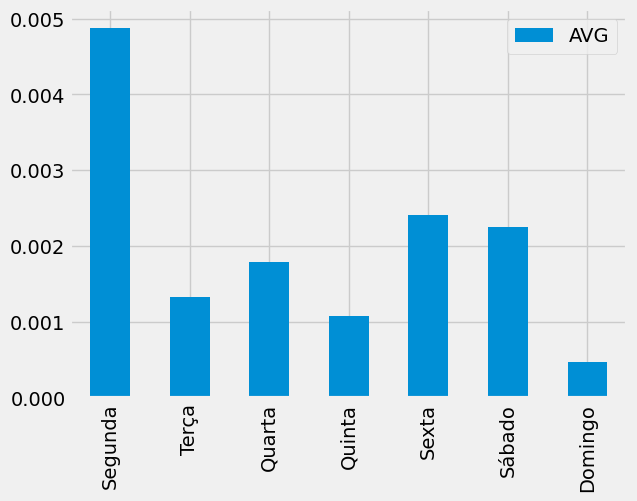

In [62]:
# Plotar o gráfico de barras com a média do retorno simples diário (DSR) para cada dia
df_melhordia.plot.bar()

Parece que segunda-feira é o melhor dia de retorno do BTC-USD e o pior é domingo.  
De acordo com a análise, o melhor dia para compra é no domingo e para venda é na segunda-feira.

# ⚠️ Isso não é uma recomendação de compra ou venda!

Apenas uma análise de dados que pode ser usada em conjunto com outras análises.